In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.0.2
matplotlib.pyplot 3.0.2
seaborn 0.9.0


In [3]:
url = 'https://health.data.ny.gov/api/views/xdss-u53e/rows.csv?accessType=DOWNLOAD'

covid_19_nys_data = pd.read_csv(url)

In [4]:
covid_19_nys_data.head(10)

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,04/08/2020,Albany,37,379,229,4633
1,04/08/2020,Allegany,1,22,12,227
2,04/08/2020,Bronx,1166,17792,2348,34277
3,04/08/2020,Broome,17,105,82,760
4,04/08/2020,Cattaraugus,2,17,15,299
5,04/08/2020,Cayuga,2,16,37,466
6,04/08/2020,Chautauqua,1,18,32,312
7,04/08/2020,Chemung,4,59,38,662
8,04/08/2020,Chenango,2,55,21,286
9,04/08/2020,Clinton,1,40,25,346


In [5]:
table = covid_19_nys_data.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                ascending=[False, False]).drop_duplicates(subset ="County", 
                                keep = 'first').reset_index(drop=True).head(10)

table['New Positives'] = table['New Positives'].map('{:,}'.format)
table['Cumulative Number of Positives'] = table['Cumulative Number of Positives'].map('{:,}'.format)
table['Total Number of Tests Performed'] = table['Total Number of Tests Performed'].map('{:,}'.format)
table['Cumulative Number of Tests Performed'] = table['Cumulative Number of Tests Performed'].map('{:,}'.format)
table.drop(['Test Date', 'New Positives', 'Total Number of Tests Performed'], axis=1, inplace=True)


print(table.to_markdown())

|    | County      | Cumulative Number of Positives   | Cumulative Number of Tests Performed   |
|---:|:------------|:---------------------------------|:---------------------------------------|
|  0 | Queens      | 27,752                           | 48,971                                 |
|  1 | Kings       | 23,394                           | 45,026                                 |
|  2 | Nassau      | 20,140                           | 44,097                                 |
|  3 | Bronx       | 17,792                           | 34,277                                 |
|  4 | Suffolk     | 17,413                           | 40,253                                 |
|  5 | Westchester | 17,004                           | 52,237                                 |
|  6 | New York    | 12,106                           | 29,083                                 |
|  7 | Rockland    | 6,665                            | 15,181                                 |
|  8 | Richmond    | 5,984    

In [6]:
covid_19_nys_data.shape

(2356, 6)

# Saving source .csv data

In [7]:
print('NYS COVID-19 data as of ' +  
      covid_19_nys_data.sort_values(by='Test Date', 
      ascending=False)['Test Date'].iloc[0] + '.')

NYS COVID-19 data as of 04/08/2020.


In [8]:
current_date = covid_19_nys_data.sort_values(by='Test Date', 
                                            ascending=False)['Test Date'].iloc[0]

In [9]:
print(current_date)

04/08/2020


In [10]:
current_date_path = current_date.replace('/', '-')

In [11]:
current_date_path

'04-08-2020'

In [12]:
data_path = 'data/New-York-State-Statewide-COVID-19-Testing-'+ current_date_path + '.csv'

In [13]:
print(data_path)

data/New-York-State-Statewide-COVID-19-Testing-04-08-2020.csv


In [14]:
covid_19_nys_data.to_csv(data_path, index=False)

# Begin Analysis

In [15]:
covid_19_nys_data.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,04/08/2020,Albany,37,379,229,4633
1,04/08/2020,Allegany,1,22,12,227
2,04/08/2020,Bronx,1166,17792,2348,34277
3,04/08/2020,Broome,17,105,82,760
4,04/08/2020,Cattaraugus,2,17,15,299


In [16]:
covid_19_nys_data.tail()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
2351,03/02/2020,Washington,0,0,0,0
2352,03/02/2020,Wayne,0,0,0,0
2353,03/02/2020,Westchester,1,1,1,1
2354,03/02/2020,Wyoming,0,0,0,0
2355,03/02/2020,Yates,0,0,0,0


In [17]:
covid_19_nys_data.columns

Index(['Test Date', 'County', 'New Positives',
       'Cumulative Number of Positives', 'Total Number of Tests Performed',
       'Cumulative Number of Tests Performed'],
      dtype='object')

In [18]:
covid_19_nys_data.dtypes

Test Date                               object
County                                  object
New Positives                            int64
Cumulative Number of Positives           int64
Total Number of Tests Performed          int64
Cumulative Number of Tests Performed     int64
dtype: object

In [19]:
covid_19_nys_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Test Date                             2356 non-null   object
 1   County                                2356 non-null   object
 2   New Positives                         2356 non-null   int64 
 3   Cumulative Number of Positives        2356 non-null   int64 
 4   Total Number of Tests Performed       2356 non-null   int64 
 5   Cumulative Number of Tests Performed  2356 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 110.6+ KB


In [20]:
covid_19_nys_data.describe()

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
count,2356.000000,2356.000000,2356.000000,2356.000000
mean,67.884975,658.179117,166.192275,1779.494482
std,241.544793,2712.543398,502.244750,6092.626273
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.750000,2.000000
50%,0.000000,3.000000,9.000000,70.500000
75%,5.000000,34.000000,43.000000,411.000000
max,2022.000000,27752.000000,5951.000000,52237.000000


In [21]:
covid_19_nys_data.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
dtype: int64

In [22]:
covid_19_nys_data.isnull().sum().sum()

0

In [23]:
covid_19_nys_data.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,04/08/2020,Albany,37,379,229,4633
1,04/08/2020,Allegany,1,22,12,227
2,04/08/2020,Bronx,1166,17792,2348,34277
3,04/08/2020,Broome,17,105,82,760
4,04/08/2020,Cattaraugus,2,17,15,299


In [24]:
covid_19_nys_data['Test Date'] = pd.to_datetime(covid_19_nys_data['Test Date'], 
                                          infer_datetime_format=True)

In [25]:
covid_19_nys_data.dtypes

Test Date                               datetime64[ns]
County                                          object
New Positives                                    int64
Cumulative Number of Positives                   int64
Total Number of Tests Performed                  int64
Cumulative Number of Tests Performed             int64
dtype: object

In [26]:
covid_19_nys_data.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,2020-04-08,Albany,37,379,229,4633
1,2020-04-08,Allegany,1,22,12,227
2,2020-04-08,Bronx,1166,17792,2348,34277
3,2020-04-08,Broome,17,105,82,760
4,2020-04-08,Cattaraugus,2,17,15,299


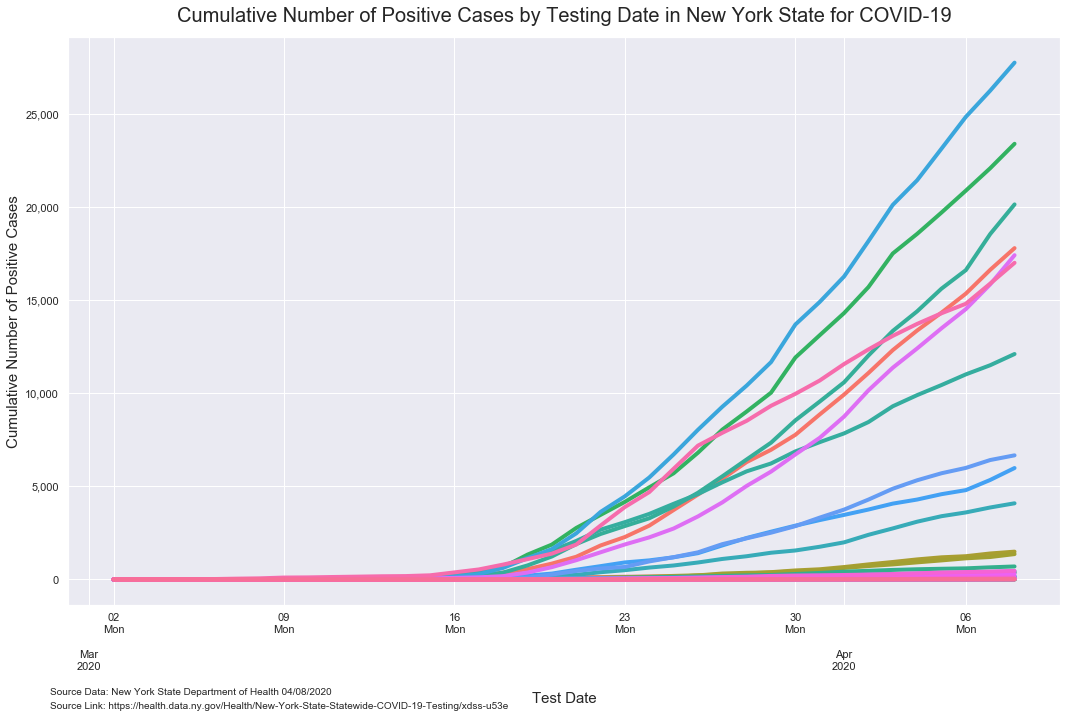

In [27]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county')

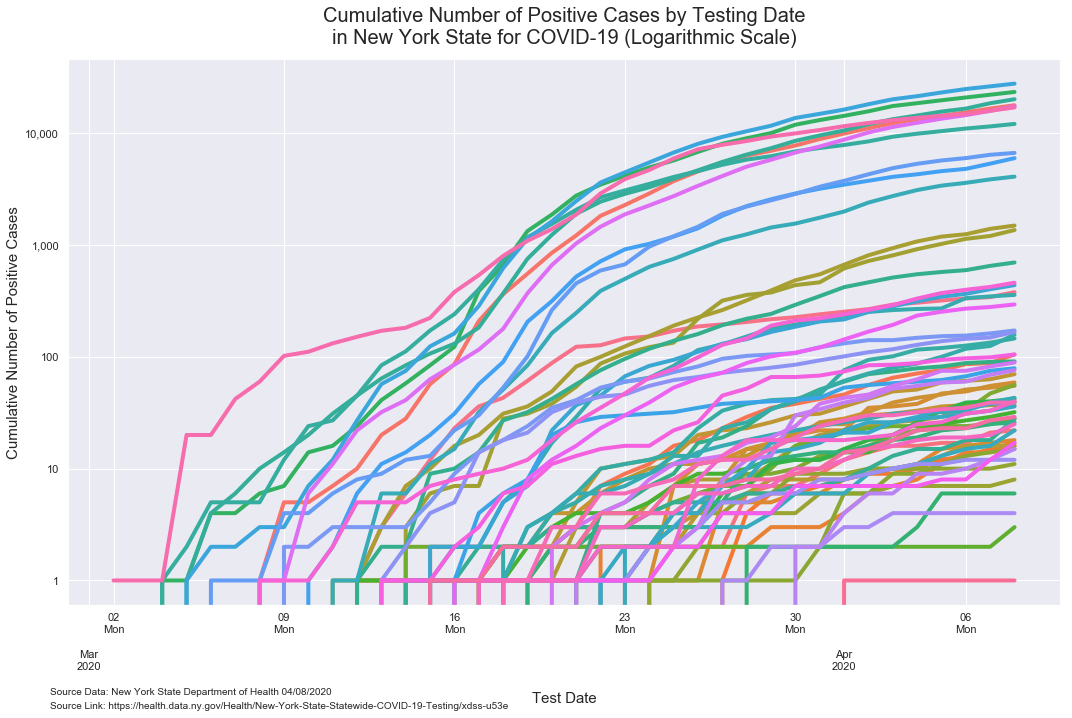

In [28]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=covid_19_nys_data, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-log')

In [30]:
drop_duplicates = covid_19_nys_data.sort_values(by="Cumulative Number of Positives", ascending=False).drop_duplicates(
                                                    subset ="County", keep = 'first')
top_10 = drop_duplicates[0:10]
top10_list = list(top_10['County'])
top_10  = covid_19_nys_data.loc[covid_19_nys_data['County'].isin(top10_list)]

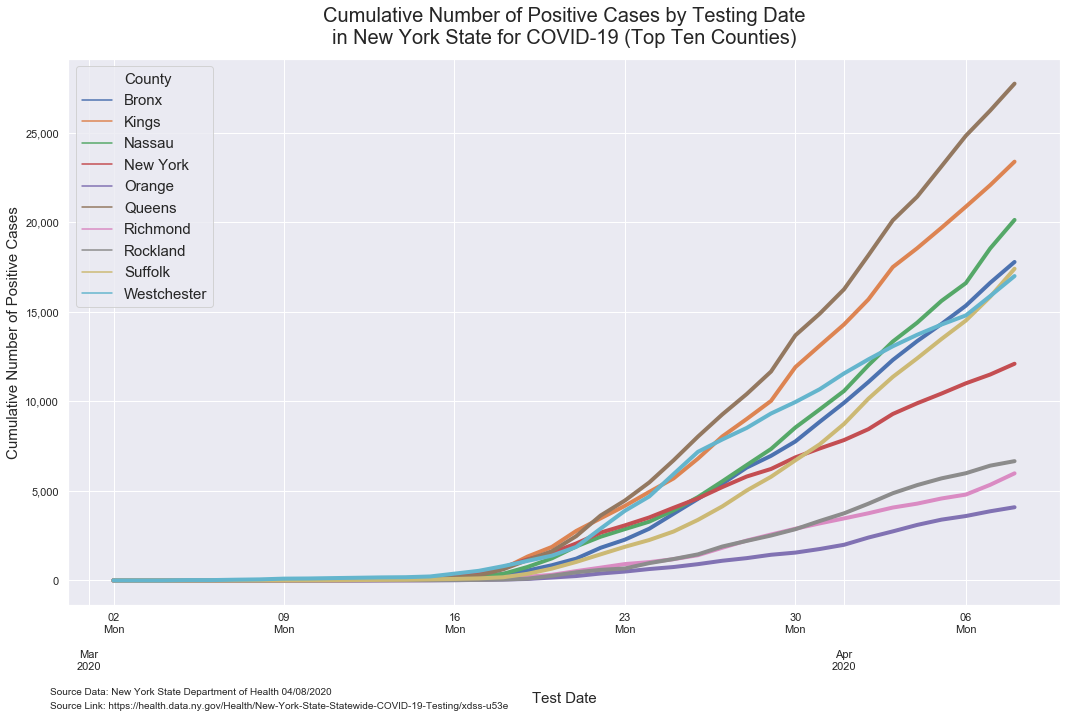

In [32]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=top_10, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10')

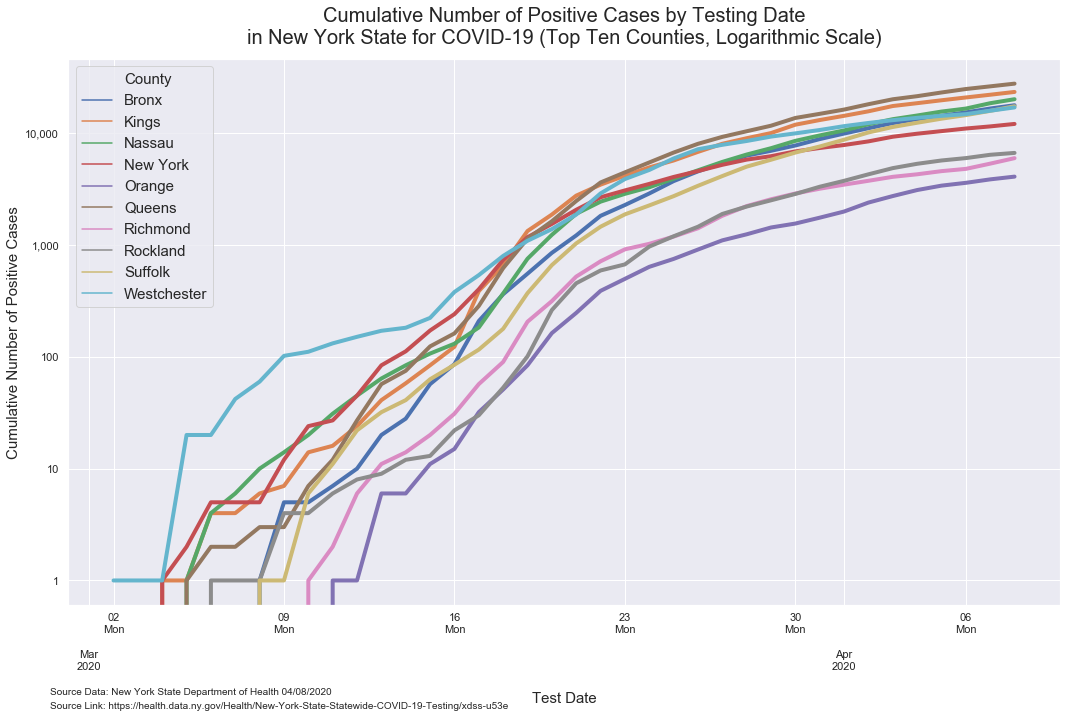

In [33]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             hue="County",
             data=top_10, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-by-county-top-10-log')

In [34]:
from_ten_cases = covid_19_nys_data.loc[covid_19_nys_data['Cumulative Number of Positives'] >= 10]

In [35]:
from_ten_cases = from_ten_cases.sort_values(by=['Test Date', 'Cumulative Number of Positives'], ascending=[True, True], ).drop_duplicates(subset ="County", keep = 'first').reset_index(drop=True)

In [36]:
from_ten_cases = from_ten_cases[['County', 'Test Date']]
from_ten_cases.rename(columns={'Test Date': 'ten_cases_date'}, inplace=True)

In [37]:
from_ten_cases

,County,ten_cases_date
0,Westchester,2020-03-05
1,Nassau,2020-03-08
2,New York,2020-03-09
3,Kings,2020-03-10
4,Suffolk,2020-03-11
5,Queens,2020-03-11
6,Bronx,2020-03-12
7,Richmond,2020-03-13
8,Rockland,2020-03-14
9,Dutchess,2020-03-15


In [38]:
from_ten_cases = covid_19_nys_data.merge(from_ten_cases, left_on='County', right_on='County')

In [39]:
from_ten_cases = from_ten_cases.loc[from_ten_cases['Cumulative Number of Positives'] >= 10]

In [40]:
from_ten_cases

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date
0,2020-04-08,Albany,37,379,229,4633,2020-03-15
1,2020-04-07,Albany,9,342,74,4404,2020-03-15
2,2020-04-06,Albany,14,333,86,4330,2020-03-15
3,2020-04-05,Albany,14,319,89,4244,2020-03-15
4,2020-04-04,Albany,12,305,117,4155,2020-03-15
...,...,...,...,...,...,...,...
2132,2020-04-04,Wyoming,4,22,16,175,2020-03-31
2133,2020-04-03,Wyoming,3,18,11,159,2020-03-31
2134,2020-04-02,Wyoming,1,15,11,148,2020-03-31
2135,2020-04-01,Wyoming,4,14,12,137,2020-03-31


In [41]:
from_ten_cases['days_from_10_cases'] = (from_ten_cases['Test Date'] - 
                                       from_ten_cases['ten_cases_date']).dt.days

In [42]:
from_ten_cases

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases
0,2020-04-08,Albany,37,379,229,4633,2020-03-15,24
1,2020-04-07,Albany,9,342,74,4404,2020-03-15,23
2,2020-04-06,Albany,14,333,86,4330,2020-03-15,22
3,2020-04-05,Albany,14,319,89,4244,2020-03-15,21
4,2020-04-04,Albany,12,305,117,4155,2020-03-15,20
...,...,...,...,...,...,...,...,...
2132,2020-04-04,Wyoming,4,22,16,175,2020-03-31,4
2133,2020-04-03,Wyoming,3,18,11,159,2020-03-31,3
2134,2020-04-02,Wyoming,1,15,11,148,2020-03-31,2
2135,2020-04-01,Wyoming,4,14,12,137,2020-03-31,1


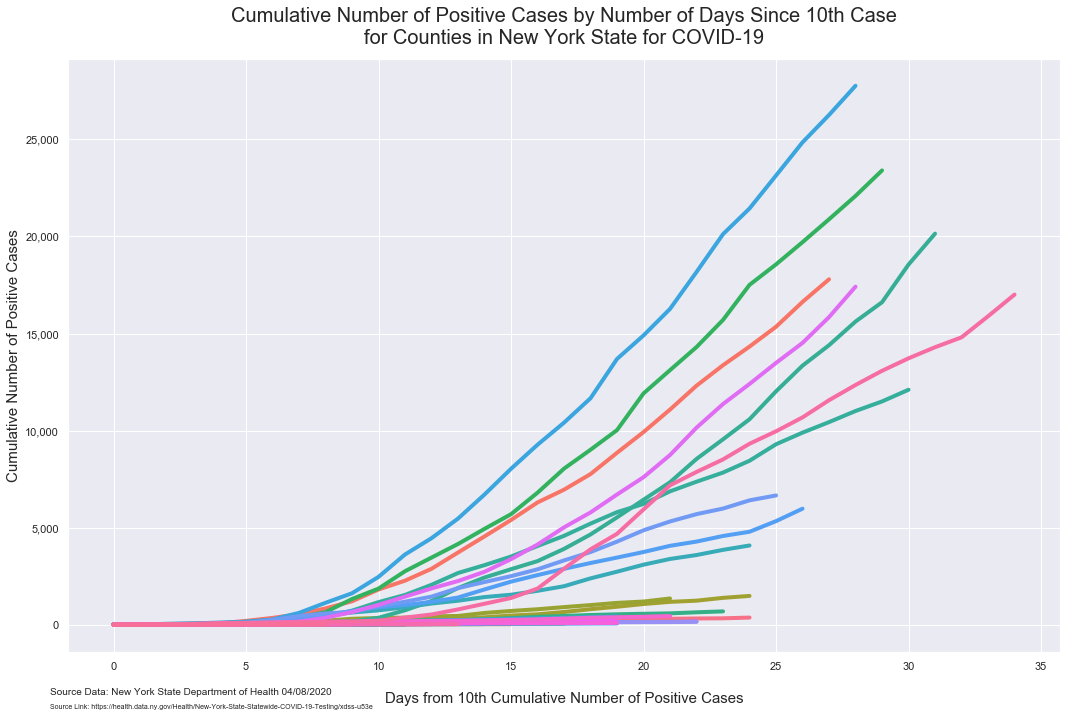

In [44]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county')

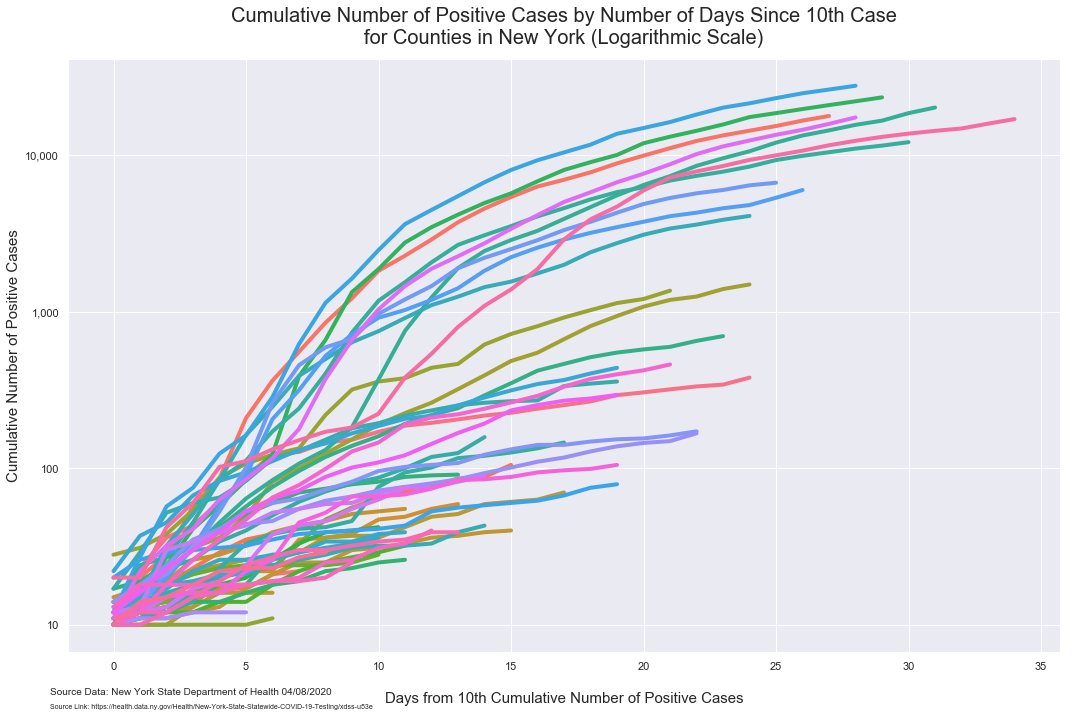

In [45]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-log')

In [46]:
top10_list = list(top_10['County'])

from_ten_cases_top_10  = from_ten_cases.loc[from_ten_cases['County'].isin(top10_list)]

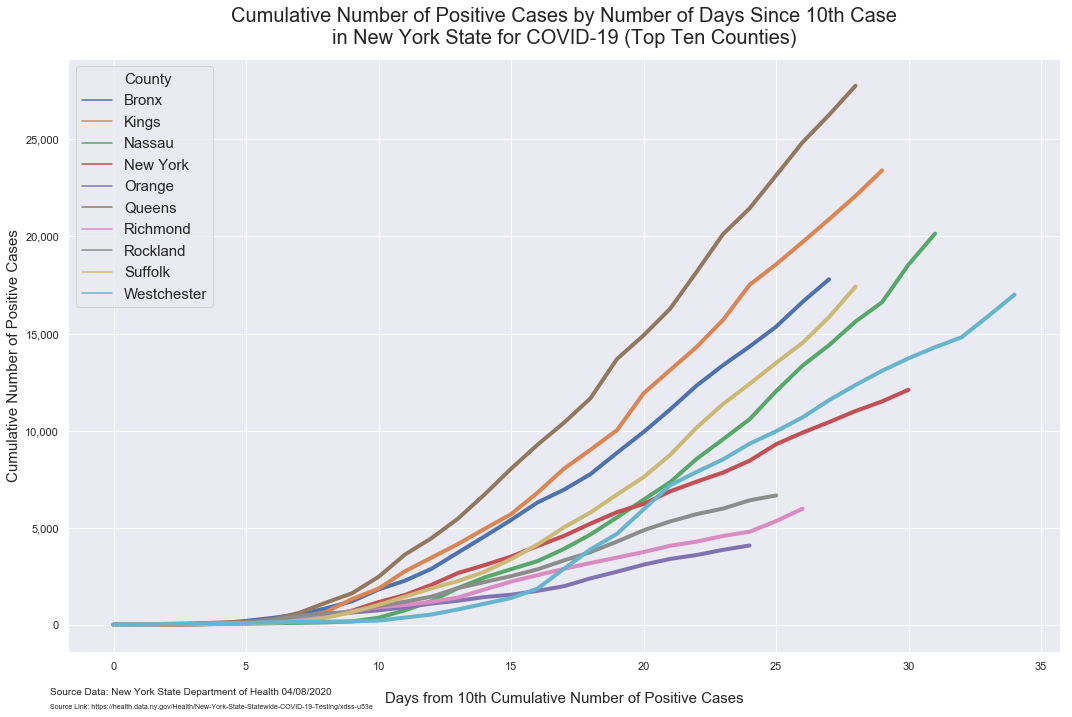

In [47]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10')

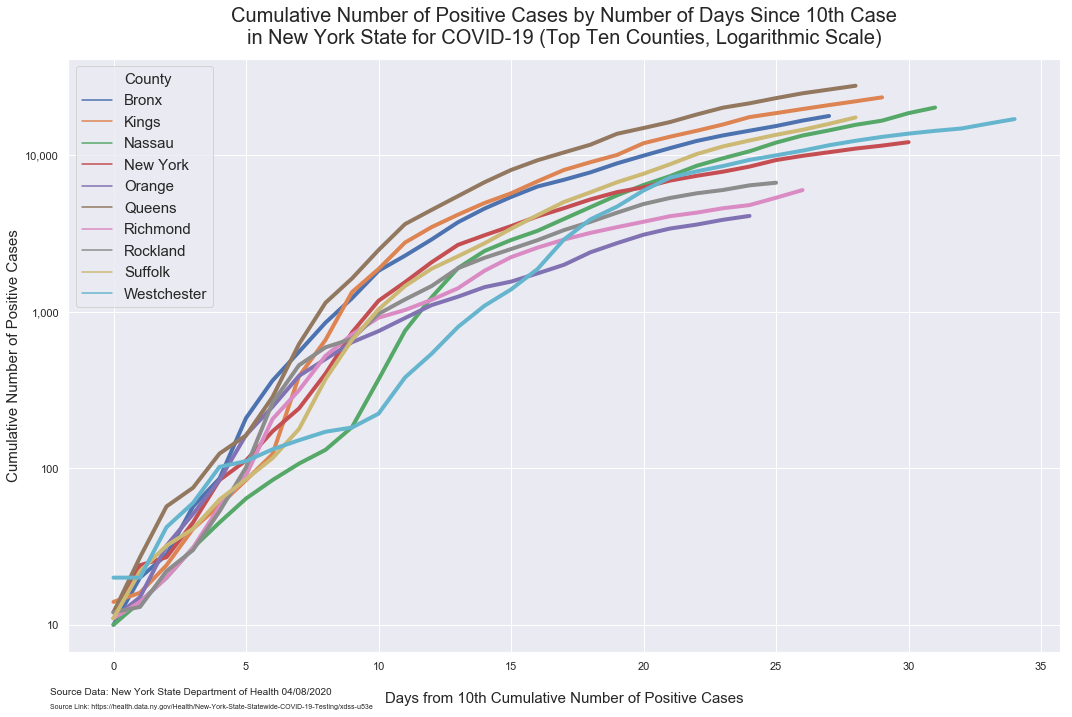

In [48]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="Cumulative Number of Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Cumulative Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-log')

In [49]:
from_ten_cases_top_10.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases
76,2020-04-08,Bronx,1166,17792,2348,34277,2020-03-12,27
77,2020-04-07,Bronx,1278,16626,2562,31929,2020-03-12,26
78,2020-04-06,Bronx,1021,15348,1996,29367,2020-03-12,25
79,2020-04-05,Bronx,959,14327,1628,27371,2020-03-12,24
80,2020-04-04,Bronx,1053,13368,1778,25743,2020-03-12,23


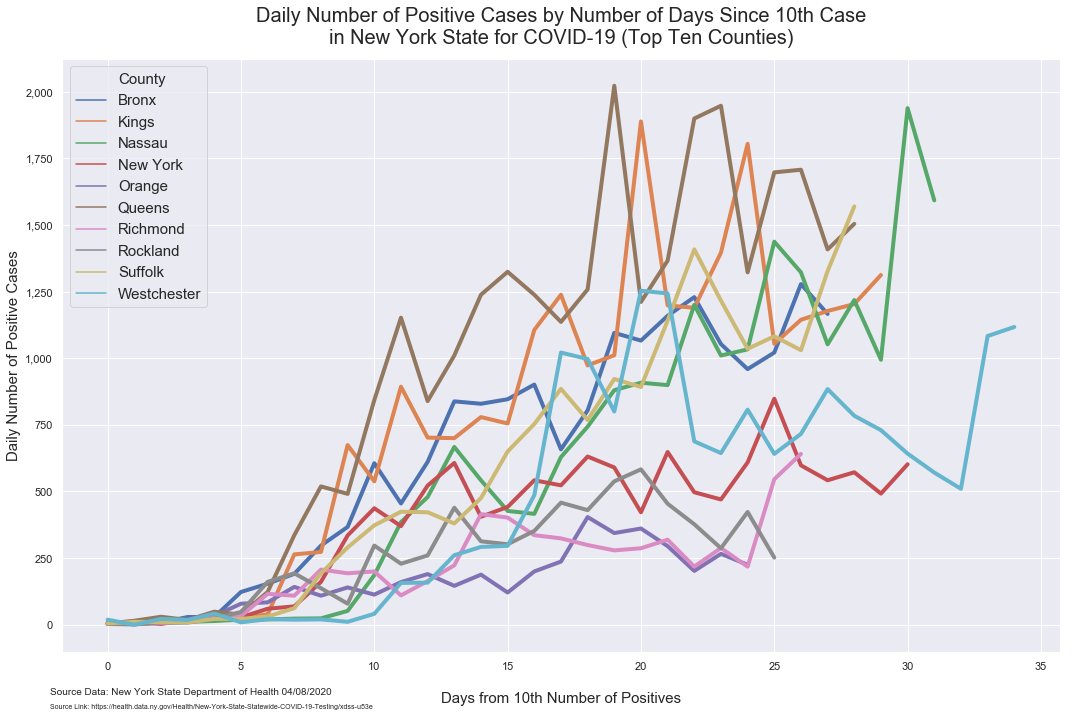

In [50]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=from_ten_cases_top_10, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positive Cases', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily')

In [53]:
from_ten_cases_top_10['New Positives'].loc[from_ten_cases_top_10['New Positives'] <= 0]

2123    0
Name: New Positives, dtype: int64

In [55]:
temp_fill_zeros = from_ten_cases_top_10.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                                 ascending=[True, True, True])

temp_fill_zeros['New Positives'].loc[from_ten_cases_top_10['New Positives'] <= 0] = 1

temp_fill_zeros

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases
103,2020-03-12,Bronx,3,10,36,190,2020-03-12,0
102,2020-03-13,Bronx,10,20,99,289,2020-03-12,1
101,2020-03-14,Bronx,8,28,80,369,2020-03-12,2
100,2020-03-15,Bronx,29,57,116,485,2020-03-12,3
99,2020-03-16,Bronx,29,86,151,636,2020-03-12,4
...,...,...,...,...,...,...,...,...
2094,2020-04-04,Westchester,642,13723,1621,43955,2020-03-05,30
2093,2020-04-05,Westchester,571,14294,1398,45353,2020-03-05,31
2092,2020-04-06,Westchester,510,14804,1348,46701,2020-03-05,32
2091,2020-04-07,Westchester,1083,15887,2647,49348,2020-03-05,33


In [62]:
temp_fill_zeros[['County', 'New Positives', 'days_from_10_cases']].loc[from_ten_cases_top_10['County'] == 'Westchester']

,County,New Positives,days_from_10_cases
2124,Westchester,19,0
2123,Westchester,1,1
2122,Westchester,22,2
2121,Westchester,18,3
2120,Westchester,42,4
2119,Westchester,9,5
2118,Westchester,21,6
2117,Westchester,19,7
2116,Westchester,20,8
2115,Westchester,11,9


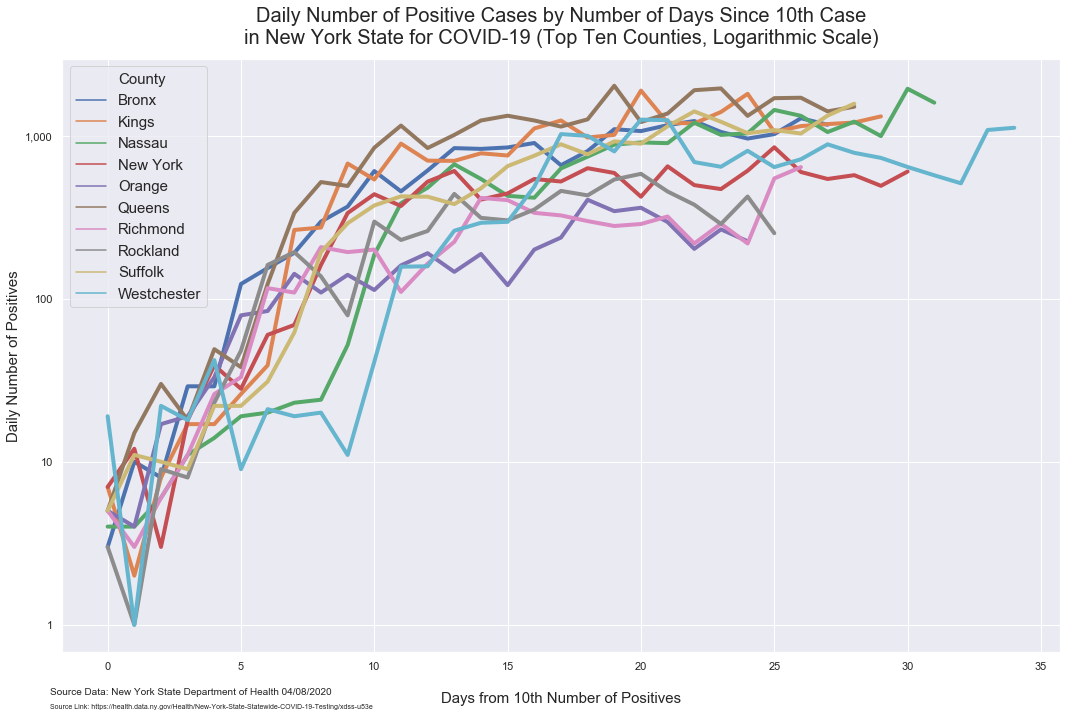

In [63]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives",
             hue="County",
             data=temp_fill_zeros, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Daily Number of Positives', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-daily-log')

In [64]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                                                ascending=[True, True, True])

In [65]:
from_ten_cases_top_10_weekly = from_ten_cases_top_10_weekly.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'New Positives': np.mean})

In [66]:
from_ten_cases_top_10_weekly.reset_index(inplace=True)
from_ten_cases_top_10_weekly.rename(columns={'New Positives': 'New Positives Weekly Average'}, inplace=True)

In [67]:
from_ten_cases_top_10_weekly

,County,Test Date,days_from_10_cases,New Positives Weekly Average
0,Bronx,2020-03-15,3,12.500000
1,Bronx,2020-03-22,10,252.428571
2,Bronx,2020-03-29,17,734.000000
3,Bronx,2020-04-05,24,1052.142857
4,Bronx,2020-04-12,27,1155.000000
5,Kings,2020-03-15,5,12.833333
6,Kings,2020-03-22,12,483.285714
7,Kings,2020-03-29,19,937.428571
8,Kings,2020-04-05,26,1381.857143
9,Kings,2020-04-12,29,1230.666667


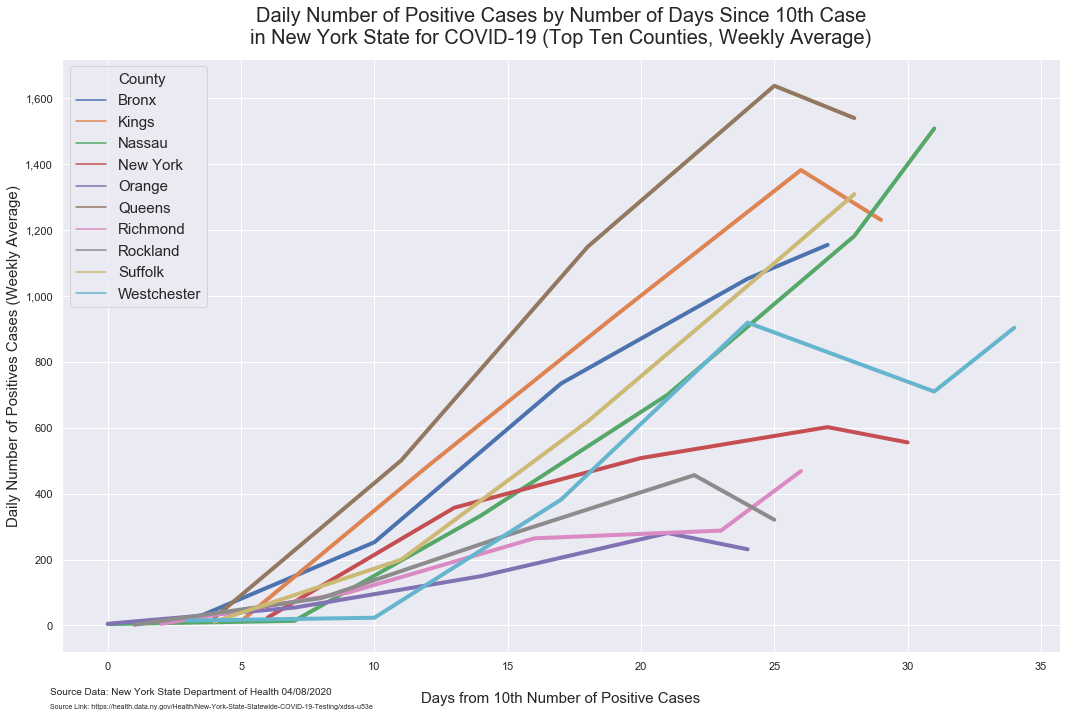

In [68]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Positives Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly')

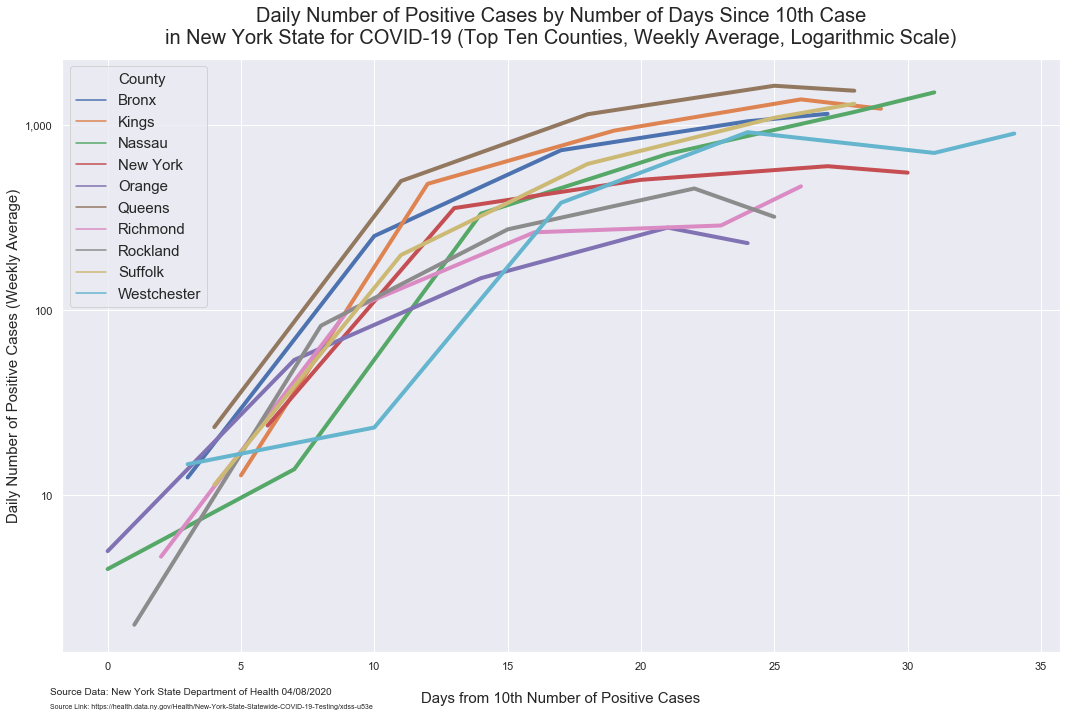

In [69]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="New Positives Weekly Average",
             hue="County",
             data=from_ten_cases_top_10_weekly, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Positive Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Positive Cases by Number of Days Since 10th Case\nin New York State for COVID-19 (Top Ten Counties, Weekly Average, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-county-top-10-weekly-log')

# Trajectory Plots

In [70]:
covid_19_nys_data.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,2020-04-08,Albany,37,379,229,4633
1,2020-04-08,Allegany,1,22,12,227
2,2020-04-08,Bronx,1166,17792,2348,34277
3,2020-04-08,Broome,17,105,82,760
4,2020-04-08,Cattaraugus,2,17,15,299


In [71]:
nys_trajectory = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

nys_trajectory.set_index('Test Date', drop=False, inplace=True)

nys_trajectory.index = pd.to_datetime(nys_trajectory.index, infer_datetime_format=True)

In [74]:
nys_trajectory['daily_cases'] = nys_trajectory['Cumulative Number of Positives'].diff()

In [75]:
nys_trajectory.head()

,Test Date,Cumulative Number of Positives,daily_cases
Test Date,,,
2020-03-02,2020-03-02,1,NaN
2020-03-03,2020-03-03,1,0.0
2020-03-04,2020-03-04,3,2.0
2020-03-05,2020-03-05,25,22.0
2020-03-06,2020-03-06,36,11.0


In [77]:
nys_trajectory['daily_cases'].loc[nys_trajectory.daily_cases < 0] = nys_trajectory['Cumulative Number of Positives']

nys_trajectory['daily_cases'].loc[nys_trajectory.daily_cases.isnull()] = nys_trajectory['Cumulative Number of Positives']

In [78]:
nys_trajectory.head()

,Test Date,Cumulative Number of Positives,daily_cases
Test Date,,,
2020-03-02,2020-03-02,1,1.0
2020-03-03,2020-03-03,1,0.0
2020-03-04,2020-03-04,3,2.0
2020-03-05,2020-03-05,25,22.0
2020-03-06,2020-03-06,36,11.0


In [80]:
nys_trajectory = nys_trajectory.set_index('Test Date').resample('W').agg({'Cumulative Number of Positives': 
                                                                    np.max, 'daily_cases': np.mean})

In [81]:
nys_trajectory.reset_index(inplace=True)
nys_trajectory.rename(columns={'daily_cases': 'daily_cases_week_avg'}, inplace=True)

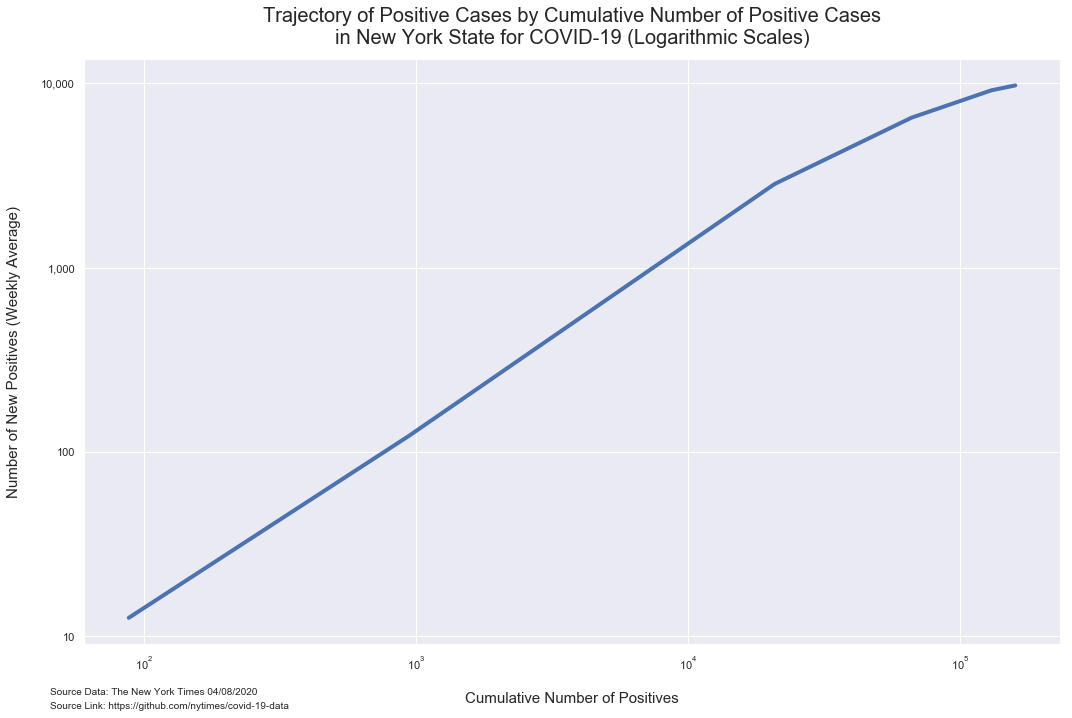

In [83]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", data=nys_trajectory, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nin New York State for COVID-19 (Logarithmic Scales)', 
          pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-log-log')

In [126]:
trajectory_plot = covid_19_nys_data.sort_values(by=['County', 'Test Date','Cumulative Number of Positives'], 
                                ascending=[True, True, True])

In [127]:
trajectory_plot.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
2294,2020-03-02,Albany,0,0,0,0
2232,2020-03-03,Albany,0,0,0,0
2170,2020-03-04,Albany,0,0,0,0
2108,2020-03-05,Albany,0,0,3,3
2046,2020-03-06,Albany,0,0,0,3


In [128]:
trajectory_plot = trajectory_plot.loc[trajectory_plot['Cumulative Number of Positives'] > 0]

In [129]:
trajectory_plot = trajectory_plot.set_index('Test Date').groupby('County').resample('W').agg({'Cumulative Number of Positives': np.max, 
                                                                                                     'New Positives': np.mean})


In [130]:
trajectory_plot[:50]

Cumulative Number of Positives  New Positives
County      Test Date                                                
Albany      2020-03-15                              12       3.000000
            2020-03-22                             127      16.428571
            2020-03-29                             217      12.857143
            2020-04-05                             319      14.571429
            2020-04-12                             379      20.000000
Allegany    2020-03-15                               2       2.000000
            2020-03-22                               2       0.000000
            2020-03-29                               7       0.714286
            2020-04-05                              17       1.428571
            2020-04-12                              22       1.666667
Bronx       2020-03-08                               1       1.000000
            2020-03-15                              57       8.000000
            2020-03-22                            1824     252.428571
            2020-03-29                            6962     734.000000
            2020-04-05                           14327    1052.142857
            2020-04-12                           17792    1155.000000
Broome      2020-03-15                               1       0.250000
            2020-03-22                               7       0.857143
            2020-03-29                              35       4.000000
            2020-04-05                              76       5.857143
            2020-04-12                             105       9.666667
Cattaraugus 2020-03-29                               6       2.000000
            2020-04-05                              12       0.857143
            2020-04-12                              17       1.666667
Cayuga      2020-03-22                               2       2.000000
            2020-03-29                               3       0.142857
            2020-04-05                              11       1.142857
            2020-04-12                              16       1.666667
Chautauqua  2020-03-29                               5       0.833333
            2020-04-05                              15       1.428571
            2020-04-12                              18       1.000000
Chemung     2020-03-29                              15       2.142857
            2020-04-05                              47       4.571429
            2020-04-12                              59       4.000000
Chenango    2020-03-22                               3       0.500000
            2020-03-29                              17       2.000000
            2020-04-05                              46       4.142857
            2020-04-12                              55       3.000000
Clinton     2020-03-22                               6       0.857143
            2020-03-29                              17       1.571429
            2020-04-05                              36       2.714286
            2020-04-12                              40       1.333333
Columbia    2020-03-22                              10       2.500000
            2020-03-29                              26       2.285714
            2020-04-05                              59       4.714286
            2020-04-12                              70       3.666667
Cortland    2020-03-22                               2       1.000000
            2020-03-29                               8       0.857143
            2020-04-05                              13       0.714286
            2020-04-12                              16       1.000000

In [131]:
trajectory_plot.reset_index(inplace=True)

trajectory_plot.rename(columns={'New Positives': 'daily_cases_week_avg'}, inplace=True)

In [132]:
trajectory_plot.head()

,County,Test Date,Cumulative Number of Positives,daily_cases_week_avg
0,Albany,2020-03-15,12,3.000000
1,Albany,2020-03-22,127,16.428571
2,Albany,2020-03-29,217,12.857143
3,Albany,2020-04-05,319,14.571429
4,Albany,2020-04-12,379,20.000000


/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


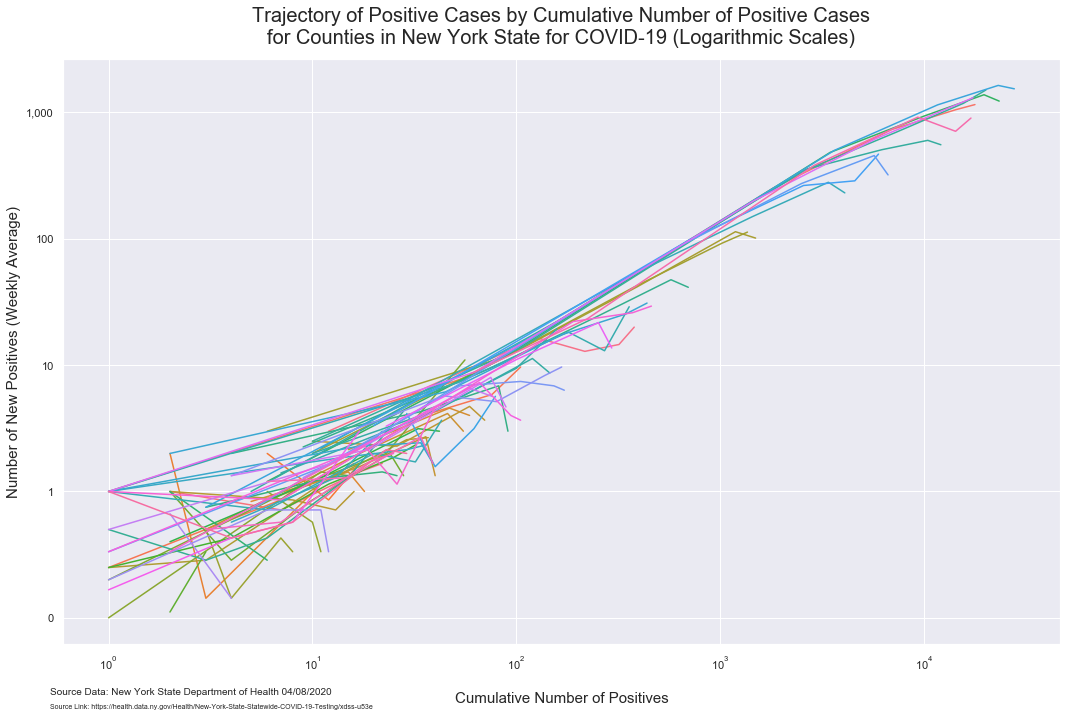

In [133]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot, ci=False)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log')

In [134]:
trajectory_plot_scatter = trajectory_plot.sort_values(by=['Test Date', 'Cumulative Number of Positives'], 
                                              ascending=[False, False]).drop_duplicates(subset ="County", 
                                              keep = 'first').reset_index(drop=True)

In [135]:
trajectory_plot_scatter.tail()

,County,Test Date,Cumulative Number of Positives,daily_cases_week_avg
57,Essex,2020-04-12,8,0.333333
58,Lewis,2020-04-12,6,0.000000
59,Schuyler,2020-04-12,4,0.000000
60,Hamilton,2020-04-12,3,0.333333
61,Yates,2020-04-12,1,0.000000


In [136]:
print(list(trajectory_plot_scatter.County))

['Queens', 'Kings', 'Nassau', 'Bronx', 'Suffolk', 'Westchester', 'New York', 'Rockland', 'Richmond', 'Orange', 'Dutchess', 'Erie', 'Monroe', 'Ulster', 'Putnam', 'Albany', 'Onondaga', 'Sullivan', 'Saratoga', 'Schenectady', 'Oneida', 'Niagara', 'Broome', 'Tompkins', 'Madison', 'Steuben', 'Rensselaer', 'St. Lawrence', 'Columbia', 'Chemung', 'Genesee', 'Chenango', 'Ontario', 'Jefferson', 'Clinton', 'Warren', 'Otsego', 'Wayne', 'Delaware', 'Oswego', 'Herkimer', 'Wyoming', 'Greene', 'Montgomery', 'Livingston', 'Washington', 'Allegany', 'Orleans', 'Chautauqua', 'Cattaraugus', 'Tioga', 'Cayuga', 'Cortland', 'Fulton', 'Seneca', 'Schoharie', 'Franklin', 'Essex', 'Lewis', 'Schuyler', 'Hamilton', 'Yates']


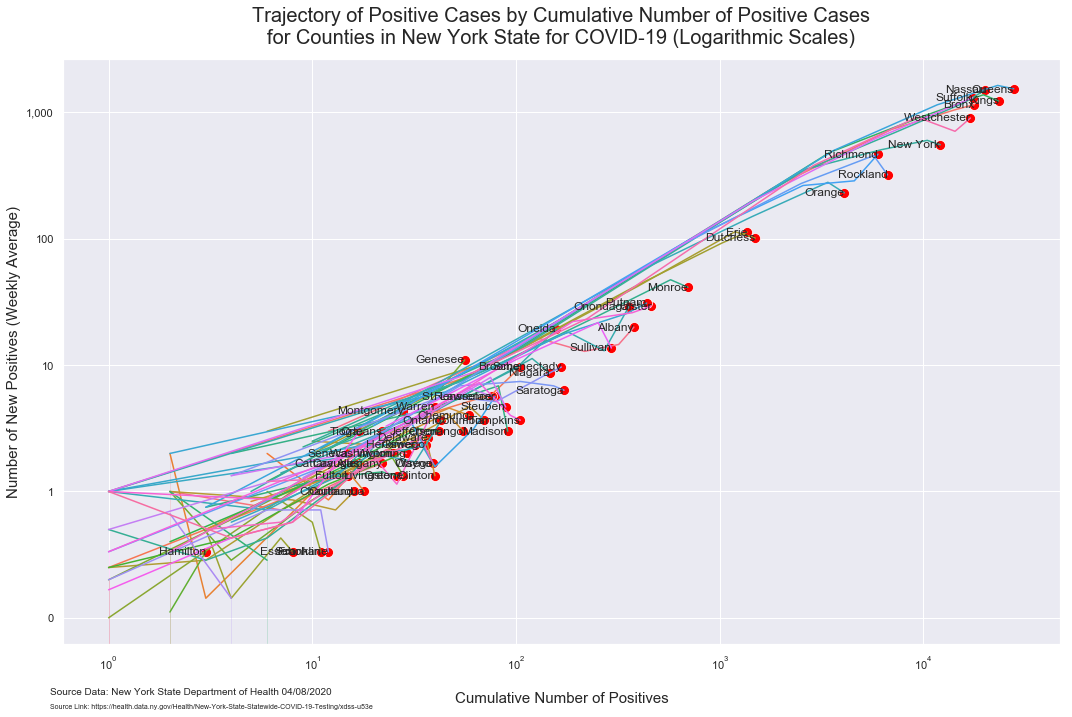

In [142]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot)

sns.scatterplot(x="Cumulative Number of Positives", y="daily_cases_week_avg", 
             data=trajectory_plot_scatter, s=100, ax=ax1, color='red')


x = trajectory_plot_scatter.daily_cases_week_avg
z = trajectory_plot_scatter['Cumulative Number of Positives']
n = trajectory_plot_scatter.County
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5
#ax1.set_xbound(lower=100)

ax1.legend_.remove()
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-log-log-scatter')

In [143]:
top10_list = list(top_10['County'])

trajectory_plot_top_10  = trajectory_plot.loc[trajectory_plot['County'].isin(top10_list)]

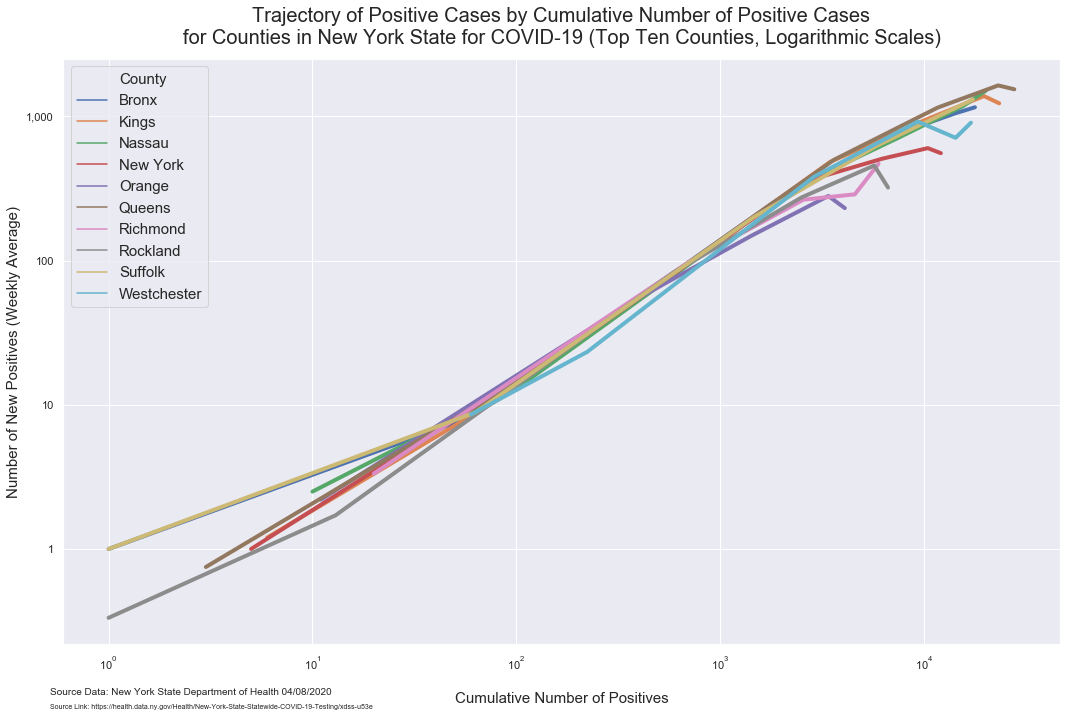

In [145]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Cumulative Number of Positives", y="daily_cases_week_avg",
             hue="County",
             data=trajectory_plot_top_10, linewidth=4)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend(fontsize=15)
ax1.set_xlabel('Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Number of New Positives (Weekly Average)', fontsize=15)
plt.title('Trajectory of Positive Cases by Cumulative Number of Positive Cases\nfor Counties in New York State for COVID-19 (Top Ten Counties, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/trajectory-nys-county-top-ten-log-log')

In [146]:
covid_19_nys_data_total = covid_19_nys_data.groupby('Test Date')['Cumulative Number of Positives'].sum().reset_index()

covid_19_nys_data_total.set_index('Test Date', drop=False, inplace=True)

covid_19_nys_data_total.index = pd.to_datetime(covid_19_nys_data_total.index, infer_datetime_format=True)

In [147]:
covid_19_nys_data_total.head(10)

,Test Date,Cumulative Number of Positives
Test Date,,
2020-03-02,2020-03-02,1
2020-03-03,2020-03-03,1
2020-03-04,2020-03-04,3
2020-03-05,2020-03-05,25
2020-03-06,2020-03-06,36
2020-03-07,2020-03-07,60
2020-03-08,2020-03-08,88
2020-03-09,2020-03-09,151
2020-03-10,2020-03-10,195


In [148]:
covid_19_nys_data_total.tail(10)

,Test Date,Cumulative Number of Positives
Test Date,,
2020-03-30,2020-03-30,75795
2020-03-31,2020-03-31,83712
2020-04-01,2020-04-01,92381
2020-04-02,2020-04-02,102863
2020-04-03,2020-04-03,113704
2020-04-04,2020-04-04,122031
2020-04-05,2020-04-05,130689
2020-04-06,2020-04-06,138863
2020-04-07,2020-04-07,149316


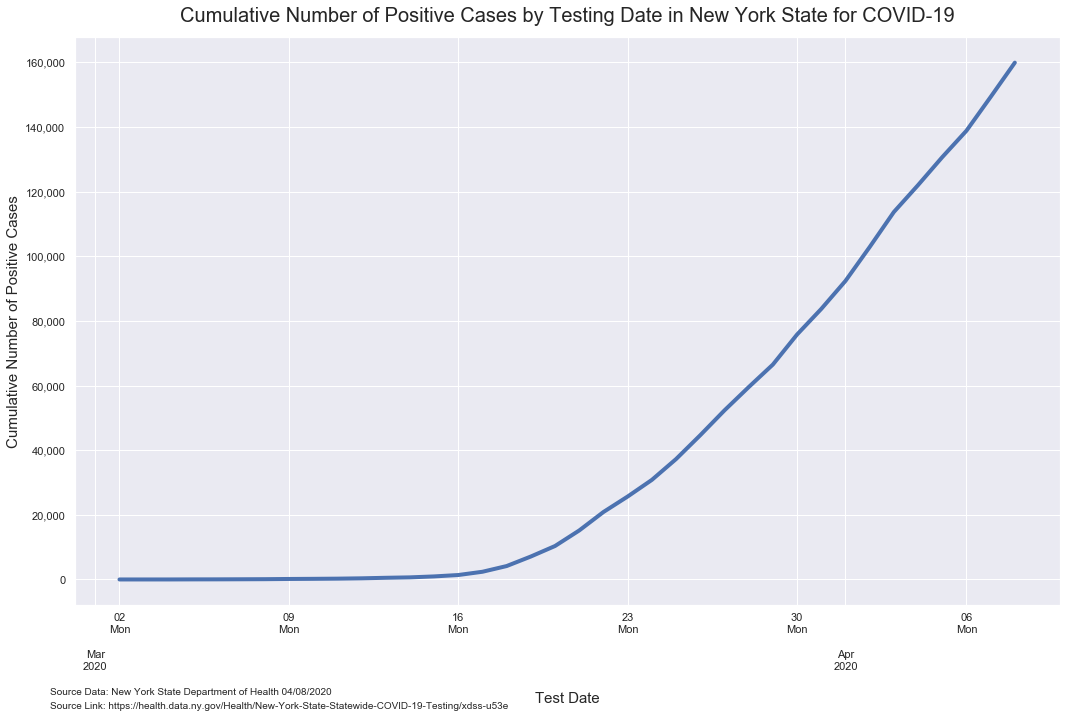

In [150]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys')

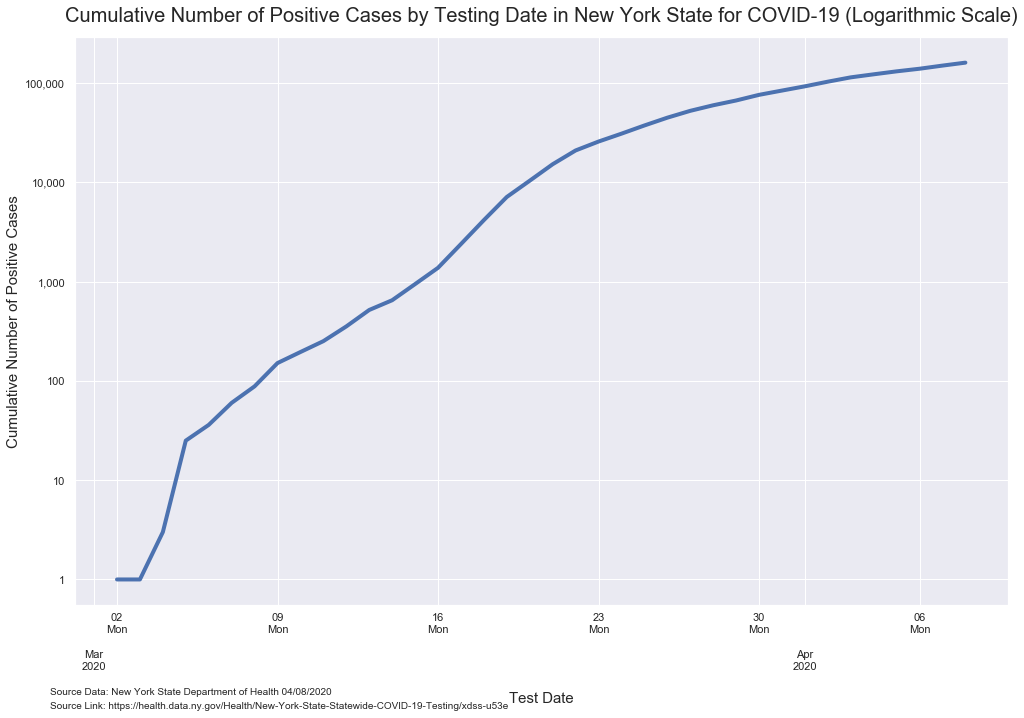

In [151]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="Test Date", y="Cumulative Number of Positives",
             data=covid_19_nys_data_total, linewidth=4, ci=None)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.set_xlabel('Test Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positive Cases', fontsize=15)
plt.title('Cumulative Number of Positive Cases by Testing Date in New York State for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries-nys-log')

# Bar Plots

In [152]:
bar_plot = covid_19_nys_data.sort_values(by = 'Test Date', 
                    ascending=False).drop_duplicates(
                    subset ="County", keep = 'first')

In [153]:
bar_plot = bar_plot.sort_values(by = 'Cumulative Number of Positives', ascending=True)

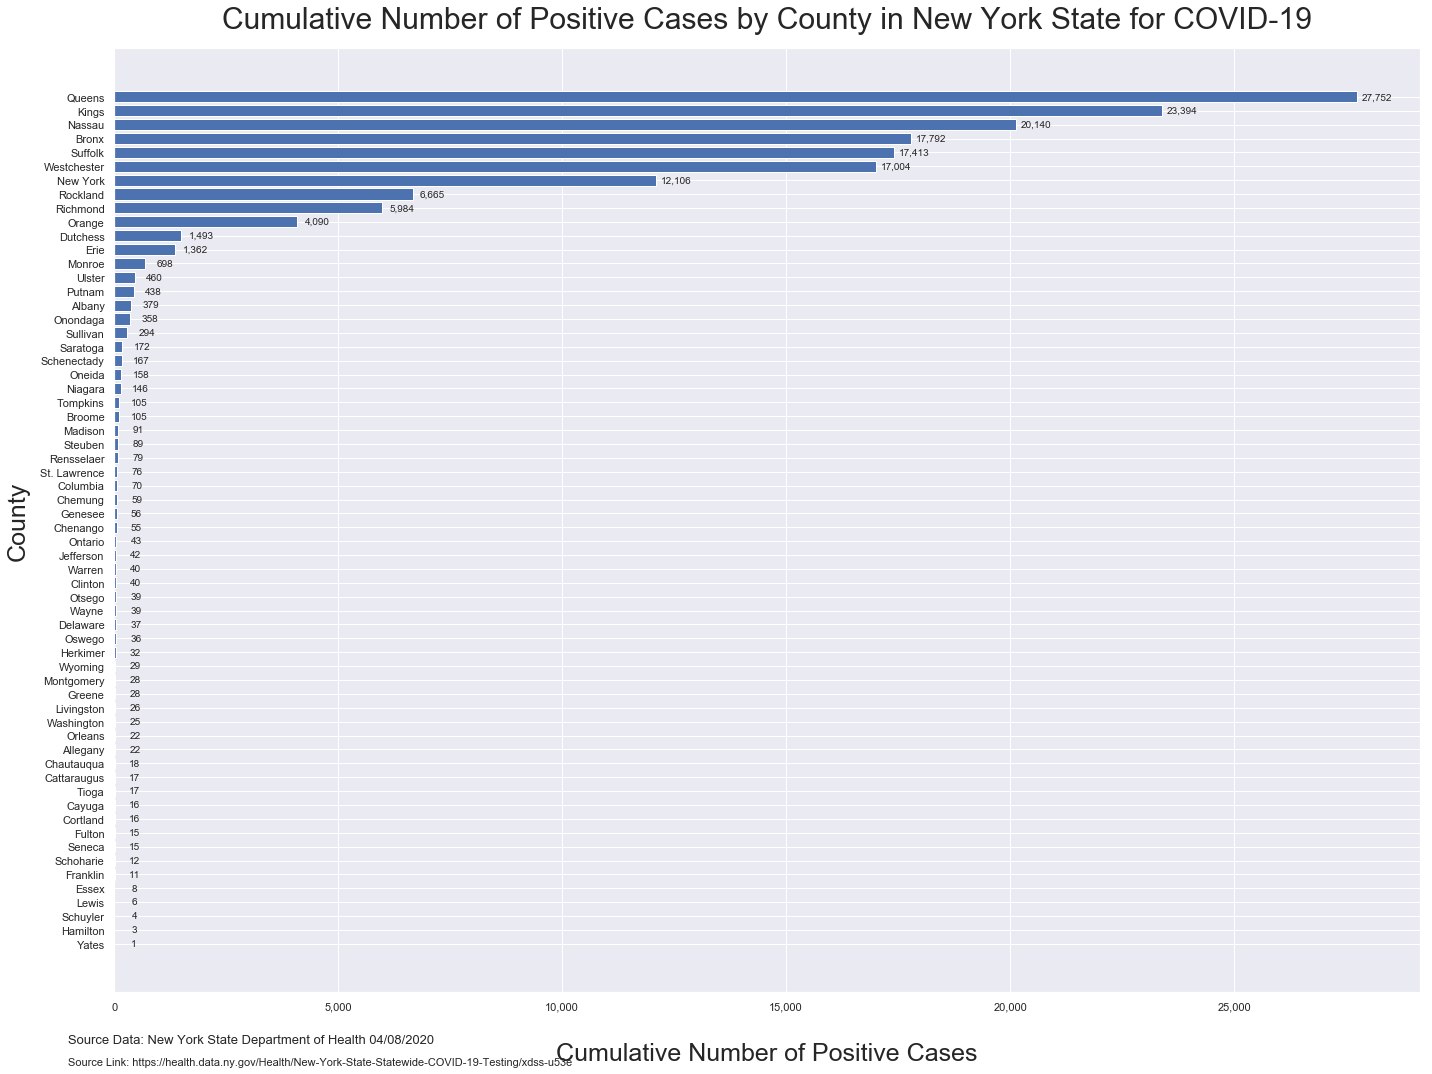

In [156]:
plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar_plot.County, bar_plot['Cumulative Number of Positives'])
plt.xlabel("Cumulative Number of Positive Cases", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("County", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=11)

plt.title("Cumulative Number of Positive Cases by County in New York State for COVID-19", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/cases-by-county-barh')

In [157]:
from_ten_cases_top_10

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases
76,2020-04-08,Bronx,1166,17792,2348,34277,2020-03-12,27
77,2020-04-07,Bronx,1278,16626,2562,31929,2020-03-12,26
78,2020-04-06,Bronx,1021,15348,1996,29367,2020-03-12,25
79,2020-04-05,Bronx,959,14327,1628,27371,2020-03-12,24
80,2020-04-04,Bronx,1053,13368,1778,25743,2020-03-12,23
...,...,...,...,...,...,...,...,...
2120,2020-03-09,Westchester,42,102,222,592,2020-03-05,4
2121,2020-03-08,Westchester,18,60,207,370,2020-03-05,3
2122,2020-03-07,Westchester,22,42,110,163,2020-03-05,2
2123,2020-03-06,Westchester,0,20,9,53,2020-03-05,1


In [158]:
growth_rate = from_ten_cases_top_10.sort_values(by=['County', 'Test Date', 'Cumulative Number of Positives'], 
                                                ascending=[True, True, True])

In [159]:
growth_rate['growth_rate'] = (growth_rate['New Positives'] / growth_rate['New Positives'].shift(1))

In [160]:
growth_rate.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases,growth_rate
103,2020-03-12,Bronx,3,10,36,190,2020-03-12,0,NaN
102,2020-03-13,Bronx,10,20,99,289,2020-03-12,1,3.333333
101,2020-03-14,Bronx,8,28,80,369,2020-03-12,2,0.800000
100,2020-03-15,Bronx,29,57,116,485,2020-03-12,3,3.625000
99,2020-03-16,Bronx,29,86,151,636,2020-03-12,4,1.000000


In [161]:
replace = growth_rate['growth_rate'].loc[growth_rate.growth_rate < 0.02]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(replace,  np.NaN)

inf = [np.inf, -np.inf]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(inf, np.nan)

In [162]:
growth_rate.head()

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases,growth_rate
103,2020-03-12,Bronx,3,10,36,190,2020-03-12,0,NaN
102,2020-03-13,Bronx,10,20,99,289,2020-03-12,1,3.333333
101,2020-03-14,Bronx,8,28,80,369,2020-03-12,2,0.800000
100,2020-03-15,Bronx,29,57,116,485,2020-03-12,3,3.625000
99,2020-03-16,Bronx,29,86,151,636,2020-03-12,4,1.000000


In [163]:
growth_rate = growth_rate.dropna(subset=['growth_rate'])

In [164]:
growth_rate.isna().sum()

Test Date                               0
County                                  0
New Positives                           0
Cumulative Number of Positives          0
Total Number of Tests Performed         0
Cumulative Number of Tests Performed    0
ten_cases_date                          0
days_from_10_cases                      0
growth_rate                             0
dtype: int64

In [165]:
growth_rate

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,ten_cases_date,days_from_10_cases,growth_rate
102,2020-03-13,Bronx,10,20,99,289,2020-03-12,1,3.333333
101,2020-03-14,Bronx,8,28,80,369,2020-03-12,2,0.800000
100,2020-03-15,Bronx,29,57,116,485,2020-03-12,3,3.625000
99,2020-03-16,Bronx,29,86,151,636,2020-03-12,4,1.000000
98,2020-03-17,Bronx,123,209,433,1069,2020-03-12,5,4.241379
...,...,...,...,...,...,...,...,...,...
2094,2020-04-04,Westchester,642,13723,1621,43955,2020-03-05,30,0.879452
2093,2020-04-05,Westchester,571,14294,1398,45353,2020-03-05,31,0.889408
2092,2020-04-06,Westchester,510,14804,1348,46701,2020-03-05,32,0.893170
2091,2020-04-07,Westchester,1083,15887,2647,49348,2020-03-05,33,2.123529


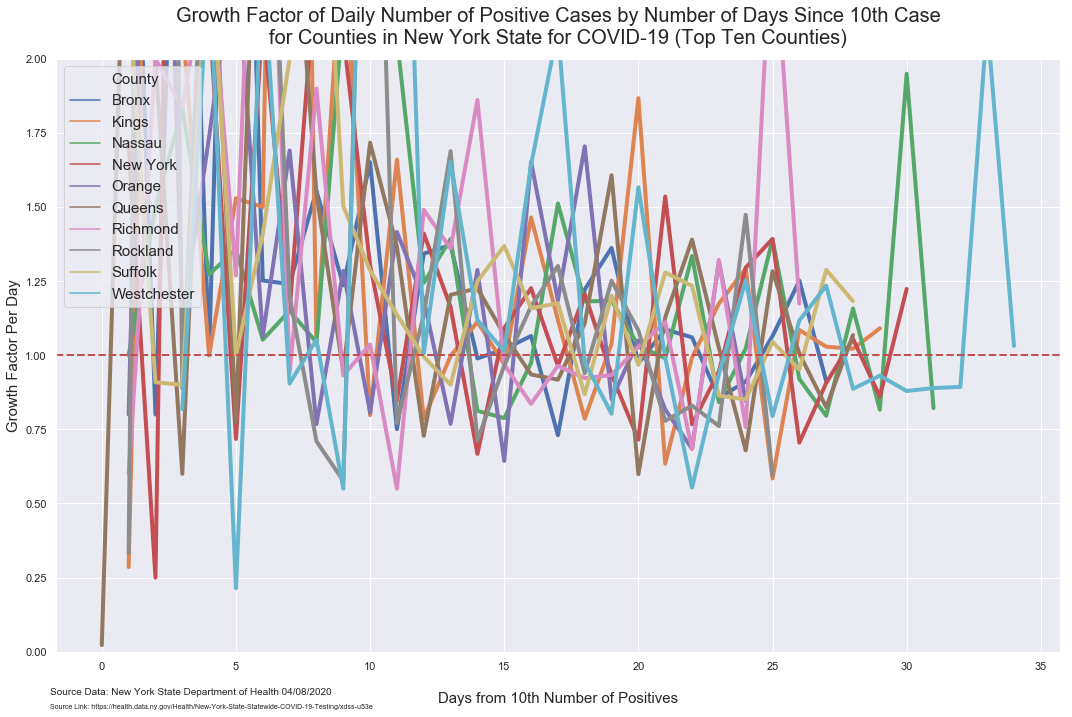

In [166]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="growth_rate",
             hue="County", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0, 2)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positives', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/growth-factor-by-county-top-10')

In [167]:
growth_rate_weekly = growth_rate.set_index('Test Date').groupby('County').resample('W').agg({'days_from_10_cases': 
                                                                    np.max, 'growth_rate': np.mean})

In [168]:
growth_rate_weekly

days_from_10_cases  growth_rate
County      Test Date                                  
Bronx       2020-03-15                   3     2.586111
            2020-03-22                  10     1.739366
            2020-03-29                  17     1.038612
            2020-04-05                  24     1.067501
            2020-04-12                  27     1.076243
Kings       2020-03-15                   5     1.788025
            2020-03-22                  12     2.145196
            2020-03-29                  19     1.069778
            2020-04-05                  26     1.090069
            2020-04-12                  29     1.047181
Nassau      2020-03-15                   7     1.309405
            2020-03-22                  14     1.758028
            2020-03-29                  21     1.094516
            2020-04-05                  28     1.066269
            2020-04-12                  31     1.195752
New York    2020-03-15                   6     2.165293
            2020-03-22                  13     1.469841
            2020-03-29                  20     0.972363
            2020-04-05                  27     1.078276
            2020-04-12                  30     1.046356
Orange      2020-03-22                   7     1.864599
            2020-03-29                  14     1.074096
            2020-04-05                  21     1.129176
            2020-04-12                  24     0.949147
Queens      2020-03-15                   4     1.668889
            2020-03-22                  11     1.759744
            2020-03-29                  18     1.026767
            2020-04-05                  25     1.101763
            2020-04-12                  28     0.966304
Richmond    2020-03-15                   2     1.300000
            2020-03-22                   9     1.821780
            2020-03-29                  16     1.157488
            2020-04-05                  23     0.994985
            2020-04-12                  26     1.478508
Rockland    2020-03-15                   1     0.333333
            2020-03-22                   8     2.873373
            2020-03-29                  15     1.372693
            2020-04-05                  22     1.049928
            2020-04-12                  25     0.943628
Suffolk     2020-03-15                   4     1.613384
            2020-03-22                  11     1.635360
            2020-03-29                  18     1.102248
            2020-04-05                  25     1.063048
            2020-04-12                  28     1.140886
Westchester 2020-03-08                   3     0.818182
            2020-03-15                  10     1.587946
            2020-03-22                  17     1.766103
            2020-03-29                  24     1.011403
            2020-04-05                  31     0.961829
            2020-04-12                  34     1.349365

In [169]:
growth_rate_weekly.reset_index(inplace=True)
growth_rate_weekly.rename(columns={'growth_rate': 'growth_rate_weekly_average'}, inplace=True)

In [170]:
growth_rate_weekly

,County,Test Date,days_from_10_cases,growth_rate_weekly_average
0,Bronx,2020-03-15,3,2.586111
1,Bronx,2020-03-22,10,1.739366
2,Bronx,2020-03-29,17,1.038612
3,Bronx,2020-04-05,24,1.067501
4,Bronx,2020-04-12,27,1.076243
5,Kings,2020-03-15,5,1.788025
6,Kings,2020-03-22,12,2.145196
7,Kings,2020-03-29,19,1.069778
8,Kings,2020-04-05,26,1.090069
9,Kings,2020-04-12,29,1.047181


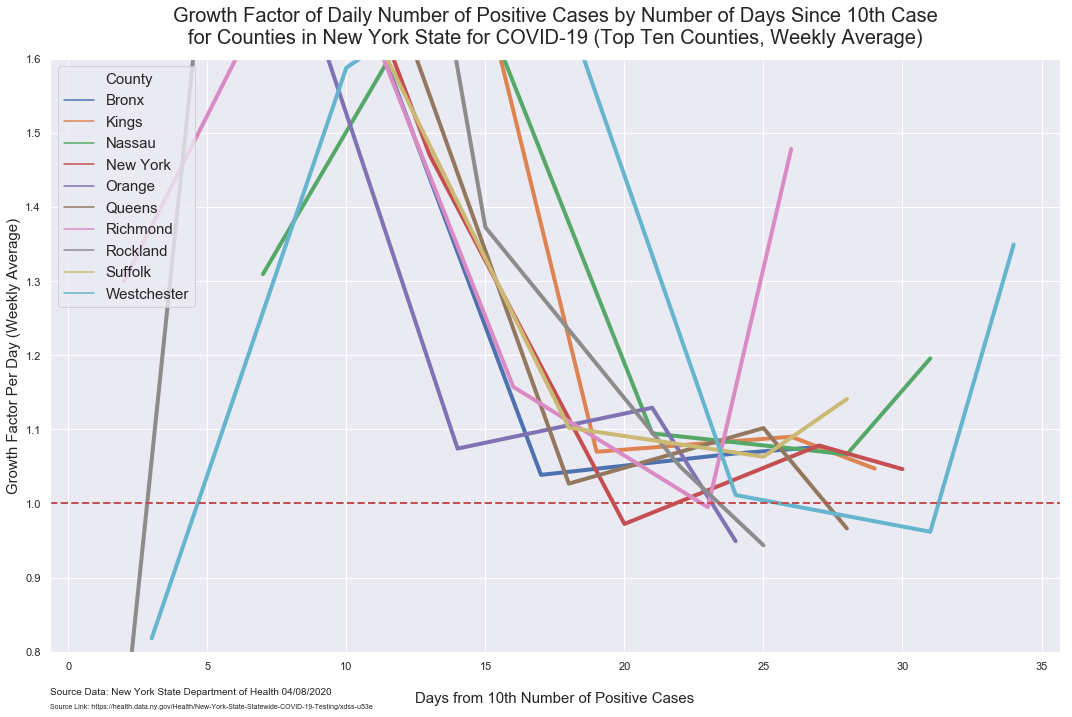

In [174]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: New York State Department of Health ' + current_date)
txt2 = ('Source Link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e')

sns.lineplot(x="days_from_10_cases", y="growth_rate_weekly_average",
             hue="County", data=growth_rate_weekly, linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0.8, 1.6)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Number of Positive Cases', fontsize=15)
ax1.set_ylabel('Growth Factor Per Day (Weekly Average)', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nfor Counties in New York State for COVID-19 (Top Ten Counties, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()
plt.savefig('figures/growth-factor-by-county-top-10-weekly')